# Task 1. Master theorem
Implement a recursive function, that implements the following recursive formula (exponentiation by squaring):

$\large a^b = (a^{\lfloor \frac{b}{2}\rfloor})^2 * a^{(b \mod 2)}$

In [1]:
def exp(a, b):
    # write your code here instead of this line
    return 1 if b == 0 else 1 / (a ** -b) if b < 0 else a ** b
    
assert exp(30., 3) == 30. ** 3
assert exp(0., 4) == 0. ** 4
assert exp(4., 0) == 1. 
assert exp(-5., -2) == 1 / ((-5.) ** 2)

### Сomplexity estimation

Estimate a complexity $T(b)$ of the function using Master theorem.

$T(b) = ... $



$T(b) \in \mathcal{O}(...)$

### Experiment proof

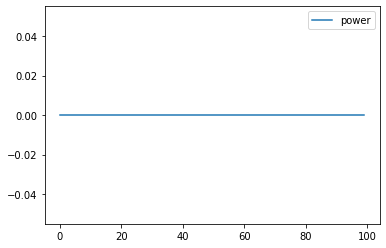

In [23]:
import matplotlib.pyplot as plt
B = list(range(100))
T = []

a = 1.1

for b in B:
    
    v = exp(a, b)
    # write your experiment code here
    T.append(0)
    
plt.plot(B, T, label="power")
plt.legend()
plt.show()

# Task 2. Branch and bound

Following function generates the nodes of a complete graph $K_{16}$. For the graph we have  couple of cool heiristics:
- Euclidean distance between 2 nodes is never less then 2
- Euclidean distance between 2 sequential nodes in the shorted Hamiltonial circuit is less then 10.


{'A': (5.0, 0.0), 'B': (4.503332099679081, 2.5999999999999996), 'C': (2.7000000000000006, 4.676537180435969), 'D': (3.429011037612589e-16, 5.6), 'E': (-2.8999999999999986, 5.022947341949744), 'F': (-5.196152422706632, 2.9999999999999996), 'G': (-6.2, 7.59281015471359e-16), 'H': (-5.542562584220409, -3.1999999999999984), 'I': (-3.300000000000003, -5.715767664977293), 'J': (-1.2491397351303002e-15, -6.8), 'K': (3.500000000000001, -6.06217782649107), 'L': (6.235382907247956, -3.600000000000003), 'M': (7.4, -1.812477262738083e-15), 'N': (6.581793068761733, 3.8), 'O': (3.9000000000000035, 6.754998149518619), 'P': (9.554720955895708e-15, 8.0)}


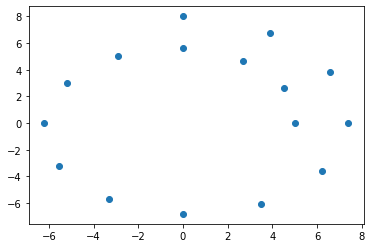

In [10]:
import math
import matplotlib.pyplot as plt

def get_nodes_as_dict():
    nodes = {}
    s = "ABCDEFGHIJKLMNOP"
    for i, c in enumerate(s):
        x = (i / 5 + 5) * math.cos(i * math.pi / 6) 
        y = (i / 5 + 5) * math.sin(i * math.pi / 6)
        nodes[c] = (x, y)
    return nodes

print(get_nodes_as_dict())
X = [n[0] for n in get_nodes_as_dict().values()]
Y = [n[1] for n in get_nodes_as_dict().values()]

plt.scatter(X, Y)
plt.show()

Implement a **brute force** method which finds an optimal (shortest) Hamiltonial cycle in this graph. Then add **branch-and-bound** heuristics and compare 2 implementations in time and number of considered cycles.

In [33]:
nodes = get_nodes_as_dict()

def length(path, nodes):
    w = [nodes[n] for n in path]
    w += [w[0]]
    d = 0.
    for i in range(1, len(w)):
        d += ((w[i][0] - w[i-1][0]) ** 2 + (w[i][1] - w[i-1][1]) ** 2) ** .5
    return d

def get_best_brute(nodes):
    # implement here
    return "ABCDGHEFIJKLMNOP"


def get_best_branch_bound(nodes):
    # implement here
    return "APFBCINJDEGHKLMO"




In [ ]:
## write here the code to measure method time

### Visualize

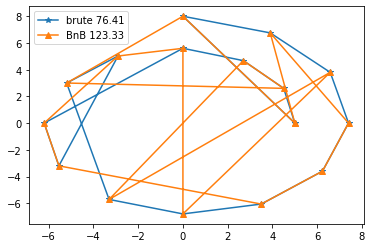

In [34]:
B = get_best_brute(nodes)
H = get_best_branch_bound(nodes)

X = [nodes[n][0] for n in B]
X += [X[0]]
Y = [nodes[n][1] for n in B]
Y += [Y[0]]

plt.plot(X, Y, marker="*", label=f"brute {length(B, nodes):.2f}")

X = [nodes[n][0] for n in H]
X += [X[0]]
Y = [nodes[n][1] for n in H]
Y += [Y[0]]

plt.plot(X, Y, marker="^", label=f"BnB {length(H, nodes):.2f}")
plt.legend()

plt.show()